
 x via Inverse A
 [[ 1002.06558106 -2280.45983096  1269.8244017 ]
 [-1432.41585118  3291.93302443 -1847.84729682]
 [  483.14350806 -1119.31382351   633.40751278]] 


 x via Elimination 
 [-8.5698482  11.66987644 -2.76280268] 
 Fit to Parabola

y(x) = a0+a1 x+a2 x^2
 a0 = 1.0 a1 = 1.1 a2= 1.24

 i   xi     yi    yfit   
 0 1.000  0.520  0.3372256
 1 1.100  0.800  0.9240246
 2 1.240  0.700  1.6527132
 3 1.350  1.800  2.1492771
 4 1.451  2.900  2.5463350
 5 1.500  2.900  2.7186604
 6 1.920  3.600  3.6515188


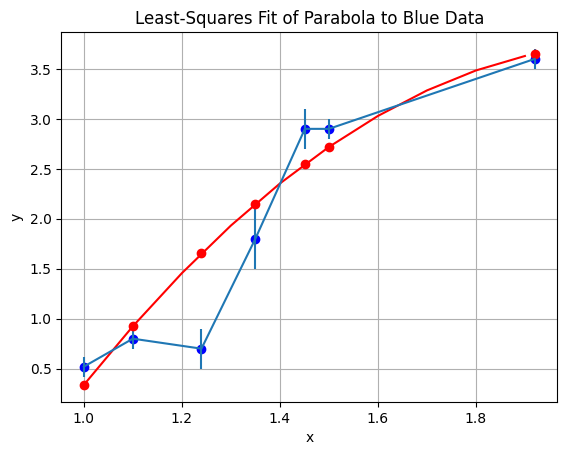

In [10]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2018. 
    Please respect copyright & acknowledge our work."""

# Fit.py: Linear least-squares fit via matrix solution

import pylab as p 
from numpy import*; from numpy.linalg import inv, solve 

Nd = 7
A = zeros( (3,3), float );  bvec = zeros((3,1), float)  # Declare
ss= sx = sxx = sy = sxxx = sxxxx = sxy = sxy = sxxy = 0.
x = array([1., 1.1, 1.24, 1.35,  1.451, 1.5, 1.92])           
y = array([0.52, 0.8, 0.7, 1.8, 2.9, 2.9, 3.6])               
sig = array([0.1, 0.1, 0.2, 0.3, 0.2, 0.1, 0.1])    # Error bars
xRange = arange(1.0, 2.0, 0.1)                      # For plots
p.plot(x, y, 'bo')                                  # Blue data
p.errorbar(x,y,sig)                                      
p.title('Least-Squares Fit of Parabola to Blue Data')                           
p.xlabel('x');  p.ylabel('y');   p.grid(True)        # Plot grid

for i in range(0, Nd):                                      
        sig2 = sig[i] * sig[i]
        ss  += 1. / sig2; sx += x[i]/sig2; sy += y[i]/sig2
        rhl  = x[i] * x[i]; sxx += rhl/sig2;  sxxy += rhl*y[i]/sig2
        sxy += x[i]*y[i]/sig2; sxxx +=rhl*x[i]/sig2
        sxxxx +=rhl*rhl/sig2
        
A    = array([ [ss,sx,sxx], [sx,sxx,sxxx], [sxx,sxxx,sxxxx] ])
bvec = array([sy, sxy, sxxy])
xvec = multiply(inv(A), bvec)                  # Invert matrix
#xvec = inv(A).dot(bvec)     #improvement by me, i think...
print('\n x via Inverse A\n', xvec, '\n' )
xvec = solve(A, bvec)                   # Solve via elimination
print('\n x via Elimination \n', xvec, '\n Fit to Parabola\n') 
print('y(x) = a0+a1 x+a2 x^2\n a0 =', x[0],'a1 =',x[1],'a2=',x[2])      
print('\n i   xi     yi    yfit   ')
for i in range(0, Nd):
    s = xvec[0] + xvec[1]*x[i] + xvec[2]*x[i]*x[i]
    print(" %d %5.3f  %5.3f  %8.7f"  %(i, x[i], y[i], s))
# red line is the fit, red dots the fits at y[i]m 
curve  = xvec[0] + xvec[1]*xRange + xvec[2]*xRange**2
points = xvec[0] + xvec[1]*x + xvec[2]*x**2
p.plot(xRange, curve,'r', x, points, 'ro')
p.show()

I want to try here cases a) and b) from the **6.7.2.1 Linear Quadratic Fit Assessment**

In [7]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2018. 
    Please respect copyright & acknowledge our work."""

# Fit.py: Linear least-squares fit via matrix solution

import pylab as p 
from numpy import*; from numpy.linalg import inv, solve 

Nd = 2 #change this for a -> 1 & b -> 2
A = zeros( (3,3), float );  bvec = zeros((3,1), float)  # Declare
ss= sx = sxx = sy = sxxx = sxxxx = sxy = sxy = sxxy = 0.

x = array([0,1])           
y = array([1,3])



sig = array([0.1, 0.1])    # Error bars #change this size for a -> 1 & b -> 2
#xRange = arange(1.0, 2.0, 0.1)                      # For plots
#p.plot(x, y, 'bo')                                  # Blue data
#p.errorbar(x,y,sig)                                      
#p.title('Least-Squares Fit of Parabola to Blue Data')                           
#p.xlabel('x');  p.ylabel('y');   p.grid(True)        # Plot grid

for i in range(0, Nd):                                      
        sig2 = sig[i] * sig[i]
        ss  += 1. / sig2; sx += x[i]/sig2; sy += y[i]/sig2
        rhl  = x[i] * x[i]; sxx += rhl/sig2;  sxxy += rhl*y[i]/sig2
        sxy += x[i]*y[i]/sig2; sxxx +=rhl*x[i]/sig2
        sxxxx +=rhl*rhl/sig2
        
A    = array([ [ss,sx,sxx], [sx,sxx,sxxx], [sxx,sxxx,sxxxx] ])
bvec = array([sy, sxy, sxxy])
xvec = multiply(inv(A), bvec)                  # Invert matrix
print('\n x via Inverse A\n', xvec, '\n' )
xvec = solve(A, bvec)                   # Solve via elimination
print('\n x via Elimination \n', xvec, '\n Fit to Parabola\n') 
print('y(x) = a0+a1 x+a2 x^2\n a0 =', x[0],'a1 =',x[1],'a2=',x[2])      
print('\n i   xi     yi    yfit   ')
for i in range(0, Nd):
    s = xvec[0] + xvec[1]*x[i] + xvec[2]*x[i]*x[i]
    print(" %d %5.3f  %5.3f  %8.7f"  %(i, x[i], y[i], s))
# red line is the fit, red dots the fits at y[i]m 

#curve  = xvec[0] + xvec[1]*xRange + xvec[2]*xRange**2
#points = xvec[0] + xvec[1]*x + xvec[2]*x**2
#p.plot(xRange, curve,'r', x, points, 'ro')
#p.show()

LinAlgError: Singular matrix

Backtracking: Reducing step size at iteration 0
Iteration 0: x = [ 272.63018543 -863.813441    289.34584623], f(x) = 12756.101982039598
Backtracking: Reducing step size at iteration 1
Iteration 1: x = [ 3728.93571469 11390.50337602 80141.85693445], f(x) = 12756.251417816484
Backtracking: Reducing step size at iteration 2
Iteration 2: x = [   51003.08117195 -1932095.48624236   628605.27745339], f(x) = 12756.252493304017
Backtracking: Reducing step size at iteration 3
Iteration 3: x = [6.97602347e+05 2.32115476e+07 1.55199330e+08], f(x) = 12756.252499946502
Backtracking: Reducing step size at iteration 4
Iteration 4: x = [ 9.54156149e+06 -3.55999515e+09  1.22700135e+09], f(x) = 12756.252499999631
Backtracking: Reducing step size at iteration 5
Iteration 5: x = [1.30506149e+08 4.29127360e+10 2.70896959e+11], f(x) = 12756.252499999997
Backtracking: Reducing step size at iteration 6
Iteration 6: x = [ 1.78501756e+09 -5.92113955e+12  2.16042575e+12], f(x) = 12756.2525
Iteration 7: x = [4.704

/var/folders/rq/4gv3g_sn73l94q6vfzvc2g6w0000gn/T/ipykernel_5490/4039167425.py:11: RuntimeWarning: overflow encountered in square
  return fr / ((E - Er)**2 + (Gamma / 2)**2)
/var/folders/rq/4gv3g_sn73l94q6vfzvc2g6w0000gn/T/ipykernel_5490/4039167425.py:11: RuntimeWarning: overflow encountered in scalar power
  return fr / ((E - Er)**2 + (Gamma / 2)**2)
/var/folders/rq/4gv3g_sn73l94q6vfzvc2g6w0000gn/T/ipykernel_5490/4039167425.py:22: RuntimeWarning: overflow encountered in square
  dL_dEr = np.sum(2 * (Breit_Wigner(E_data, fr, Er, Gamma) - g_data) * (E_data - Er) / ((E_data - Er)**2 + (Gamma / 2)**2))
/var/folders/rq/4gv3g_sn73l94q6vfzvc2g6w0000gn/T/ipykernel_5490/4039167425.py:22: RuntimeWarning: overflow encountered in scalar power
  dL_dEr = np.sum(2 * (Breit_Wigner(E_data, fr, Er, Gamma) - g_data) * (E_data - Er) / ((E_data - Er)**2 + (Gamma / 2)**2))
/var/folders/rq/4gv3g_sn73l94q6vfzvc2g6w0000gn/T/ipykernel_5490/4039167425.py:23: RuntimeWarning: overflow encountered in square
  dL_

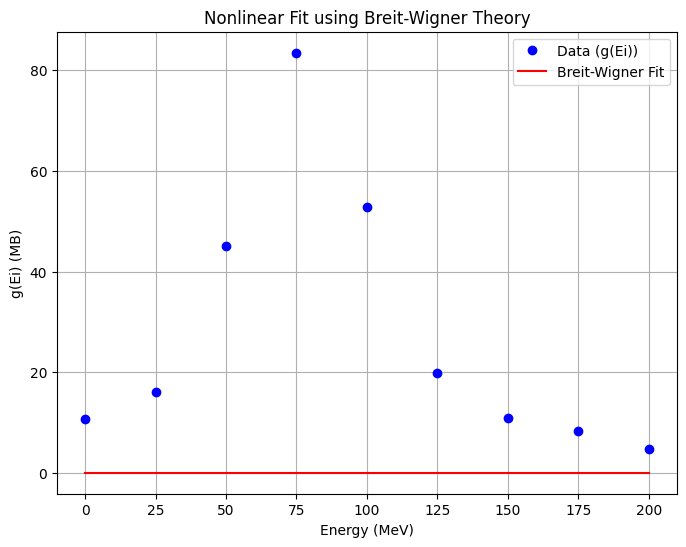

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Given Data (Table 6.1)
Ei = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])  # Energy (MeV)
g_Ei = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])  # g(Ei) (MB)
error = np.array([9.34, 17.9, 41.5, 85.5, 51.5, 21.5, 10.8, 6.29, 4.14])  # Error (MB)

# Breit-Wigner Function (Equation 6.58)
def Breit_Wigner(E, fr, Er, Gamma):
    return fr / ((E - Er)**2 + (Gamma / 2)**2)

# Objective Function for Least Squares Fitting (LHS)
def LHS(params, E_data, g_data):
    fr, Er, Gamma = params
    return np.sum((Breit_Wigner(E_data, fr, Er, Gamma) - g_data)**2)

# Derivative of LHS with respect to parameters (Jacobian for Newton-Raphson)
def LHS_prime(params, E_data, g_data):
    fr, Er, Gamma = params
    dL_dfr = np.sum(2 * (Breit_Wigner(E_data, fr, Er, Gamma) - g_data) / fr)
    dL_dEr = np.sum(2 * (Breit_Wigner(E_data, fr, Er, Gamma) - g_data) * (E_data - Er) / ((E_data - Er)**2 + (Gamma / 2)**2))
    dL_dGamma = np.sum(2 * (Breit_Wigner(E_data, fr, Er, Gamma) - g_data) * (Gamma / 2) / ((E_data - Er)**2 + (Gamma / 2)**2))
    return np.array([dL_dfr, dL_dEr, dL_dGamma])

# Newton-Raphson Method with Backtracking
def Newton_RaphsonB(initial_guess, E_data, g_data, tol=1e-6, max_iter=100, backtrack_factor=0.5):
    x = np.array(initial_guess)  # Ensure initial guess is a numpy array
    for it in range(max_iter):
        fx = LHS(x, E_data, g_data)
        f_prime_x = LHS_prime(x, E_data, g_data)
        
        # Avoid division by zero or too small derivative
        if np.any(np.isnan(f_prime_x)):
            print(f"Derivative is zero or undefined at x = {x}.")
            break
        
        # Newton-Raphson update
        x_new = x - fx / f_prime_x
        
        # Backtracking if the next guess does not reduce the error sufficiently
        if abs(LHS(x_new, E_data, g_data)) > abs(fx):
            print(f"Backtracking: Reducing step size at iteration {it}")
            x_new = x - backtrack_factor * (fx / f_prime_x)    

        # Convergence check
        if abs(LHS(x_new, E_data, g_data)) < tol:
            print(f"\nRoot found with precision {tol}: x = {x_new}")
            return x_new
        
        x = x_new
        print(f"Iteration {it}: x = {x}, f(x) = {LHS(x, E_data, g_data)}")
        
        # Maximum iterations reached
        if it == max_iter - 1:
            print("\nNo root found after N iterations.")
            return x
    
    return x

# Initial guess for parameters (fr, Er, Gamma)
initial_guess = [20, 100, 10]

# Perform nonlinear fit using Newton-Raphson method
best_fit_params = Newton_RaphsonB(initial_guess, Ei, g_Ei)

# Output the best fit parameters
fr, Er, Gamma = best_fit_params
print(f"Best Fit Parameters: fr = {fr}, Er = {Er}, Gamma = {Gamma}")

# Plot the results for comparison
E_plot = np.linspace(min(Ei), max(Ei), 100)
fit_curve = Breit_Wigner(E_plot, fr, Er, Gamma)

plt.figure(figsize=(8, 6))
plt.plot(Ei, g_Ei, 'bo', label="Data (g(Ei))")
plt.plot(E_plot, fit_curve, 'r-', label="Breit-Wigner Fit")
plt.xlabel('Energy (MeV)')
plt.ylabel('g(Ei) (MB)')
plt.legend()
plt.title('Nonlinear Fit using Breit-Wigner Theory')
plt.grid(True)
plt.show()
